# Question-2

In [1]:
import json
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
tweets_data_path = 'tweets_#gohawks.txt'

tweets_firstpost_date = []
tweets_title = []
tweets_tweet = []
tweets_metrics = []
tweets_file = open(tweets_data_path, "rt" )
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_firstpost_date.append(tweet['firstpost_date'])
        tweets_tweet.append(tweet['tweet'])
        tweets_title.append(tweet['title'])
        tweets_metrics .append(tweet['metrics'])
    except:
        continue
#tweets_title

In [4]:
tweets = pd.DataFrame()
tweets['firstpost_date'] = tweets_firstpost_date
tweets['tweet'] = tweets_tweet
tweets['title'] = tweets_title
tweets['metrics'] = tweets_metrics
Tweet_details = pd.DataFrame.from_records(tweets['tweet'])
Metrics = pd.DataFrame.from_records(tweets['metrics'])
#tweets

In [5]:
Tweet_details.keys()

Index([u'contributors', u'coordinates', u'created_at', u'entities',
       u'extended_entities', u'favorite_count', u'favorited', u'filter_level',
       u'geo', u'id', u'id_str', u'in_reply_to_screen_name',
       u'in_reply_to_status_id', u'in_reply_to_status_id_str',
       u'in_reply_to_user_id', u'in_reply_to_user_id_str', u'lang', u'place',
       u'possibly_sensitive', u'retweet_count', u'retweeted', u'scopes',
       u'source', u'text', u'timestamp_ms', u'truncated', u'user'],
      dtype='object')

In [6]:
tweet_user = []
for elements in Tweet_details['user']:
    tweet_user.append(elements)
tweet_user = pd.DataFrame(tweet_user)
#tweet_user

In [7]:
from datetime import datetime

tweet_initial = 1420102800
tweet_final = tweets.firstpost_date[len(tweets.firstpost_date)-1]
n_bins = int(math.ceil((tweet_final - tweet_initial)/3600)+1)

tweet_initial = [datetime.fromtimestamp(1420102800).month,
                     datetime.fromtimestamp(1420102800).day,
                     datetime.fromtimestamp(1420102800).hour]

Time_stamps = []
for x in tweets['firstpost_date']:
   Time_stamps.append([datetime.fromtimestamp(x).month,  datetime.fromtimestamp(x).day,  datetime.fromtimestamp(x).hour,
                       datetime.fromtimestamp(x).year])
print(tweet_initial)

n_bins

[1, 1, 1]


890

In [8]:
import numpy as np
n_tweets = np.zeros((n_bins,1))
n_retweets = np.zeros((n_bins,1))
n_followers = np.zeros((n_bins,1))
max_followers = np.zeros((n_bins,1))
n_hours = np.zeros((n_bins,1))
day_of_week = np.zeros((n_bins,1))
index = 0
for Time in Time_stamps:
    if (Time[3]>2014):
        index_2 = (Time[0]-tweet_initial[0])*31*24 + (Time[1]-tweet_initial[1])*24 + (Time[2]-tweet_initial[2])
        #index_2 = 8760*(Time[3]-2014) + (Time[0]-tweet_initial[0])*31*24 + (Time[1]-tweet_initial[1])*24 + (Time[2]-tweet_initial[2])
        n_tweets[index_2] += 1
        n_retweets[index_2] += Tweet_details.retweet_count[index]
        n_followers[index_2] += tweet_user.followers_count[index]
        max_followers[index_2] = max(tweet_user.followers_count[index], max_followers[index_2])
    index +=1
for i in range (0,n_bins):
    n_hours[i] = (i+tweet_initial[2]) % 24 
    day_of_week[i] = (np.ceil((i+12) / 24)+4) % 7
features_1 = np.concatenate((n_hours[0:-1], n_tweets[0:-1], n_retweets[0:-1], n_followers[0:-1], max_followers[0:-1] ), axis=1)
#features = [n_hours[0:-1], n_tweets[0:-1], n_retweets[0:-1], n_followers[0:-1], max_followers[0:-1]]
#features_1 = pd.DataFrame(features_1)
features_1
target = n_tweets[1:len(n_tweets)]

In [9]:
import statsmodels.api as sm
def reg_m(y, x):
    #ones = np.ones(len(x[0]))
    X = sm.add_constant(x)
    results = sm.regression.linear_model.OLS(y, X).fit()
    return results

model = reg_m(target, features_1)
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     154.5
Date:                Wed, 22 Mar 2017   Prob (F-statistic):          7.17e-118
Time:                        20:13:32   Log-Likelihood:                -7201.0
No. Observations:                 889   AIC:                         1.441e+04
Df Residuals:                     883   BIC:                         1.444e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         70.1859     52.086      1.347      0.1

# Question-3

In [53]:
hashes = []
for elements in Tweet_details['entities']:
    hashes.append(elements)
Hashtags = pd.DataFrame.from_records(hashes)
hashtags_per_tweet = np.zeros((len(tweets),1))
x = 0
for elements in Hashtags.hashtags:
    for elements2 in elements:
        hashtags_per_tweet[x] += 1
    x = x+1
hashtags_per_tweet

array([[ 1.],
       [ 2.],
       [ 7.],
       ..., 
       [ 4.],
       [ 3.],
       [ 3.]])

In [54]:
n_hashtags = np.zeros((n_bins,1))
sum_favourited = np.zeros((n_bins,1))
sum_friends = np.zeros((n_bins,1))
n_verified_users = np.zeros((n_bins,1))
sum_citations = np.zeros((n_bins,1))
sum_ranking_score = np.zeros((n_bins,1))
sum_statuses_count = np.zeros((n_bins,1))

index = 0
for Time in Time_stamps:
    if (Time[3]>2014):
        index_2 = (Time[0]-tweet_initial[0])*31*24 + (Time[1]-tweet_initial[1])*24 + (Time[2]-tweet_initial[2])
        n_hashtags[index_2] += hashtags_per_tweet[index]
        sum_favourited[index_2] += Tweet_details.favorite_count[index]
        sum_friends[index_2] += tweet_user.friends_count[index]
        n_verified_users[index_2] += tweet_user.verified[index]*1
        sum_citations[index_2] += tweets.metrics[index]['citations']['total']
        sum_ranking_score[index_2] += tweets.metrics[index]['ranking_score'] 
        sum_statuses_count[index_2] += tweet_user.statuses_count[index]
    index +=1
new_features_1 = np.concatenate((n_tweets[0:-1], n_retweets[0:-1],n_followers[0:-1],
                                 n_hashtags[0:-1], sum_favourited[0:-1],sum_friends[0:-1],
                                 n_verified_users[0:-1], sum_citations[0:-1], sum_ranking_score[0:-1],
                                 sum_statuses_count[0:-1]),axis=1)
#new_features = ([n_tweets[0:-1], n_retweets[0:-1], n_followers[0:-1], 
#                n_hashtags[0:-1], sum_favourited[0:-1],sum_friends[0:-1],
#               n_verified_users[0:-1], sum_citations[0:-1], sum_ranking_score[0:-1], sum_statuses_count[0:-1]])
#new_features = pd.DataFrame(new_features)
#new_features_1

In [55]:
new_model = reg_m(target, new_features_1)
print new_model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     144.4
Date:                Wed, 22 Mar 2017   Prob (F-statistic):          8.85e-178
Time:                        19:55:19   Log-Likelihood:                -7048.0
No. Observations:                 889   AIC:                         1.412e+04
Df Residuals:                     878   BIC:                         1.417e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -16.4004     25.062     -0.654      0.5

In [12]:
new_features_2 = np.concatenate((n_tweets[0:-1], n_retweets[0:-1],n_followers[0:-1],
                                 n_hashtags[0:-1],
                                sum_ranking_score[0:-1]),axis=1)

In [13]:
new_model2 = reg_m(target, new_features_2)
print new_model2.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 22 Mar 2017   Prob (F-statistic):          9.38e-169
Time:                        18:56:37   Log-Likelihood:                -7082.7
No. Observations:                 889   AIC:                         1.418e+04
Df Residuals:                     883   BIC:                         1.421e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         28.0421     24.902      1.126      0.2

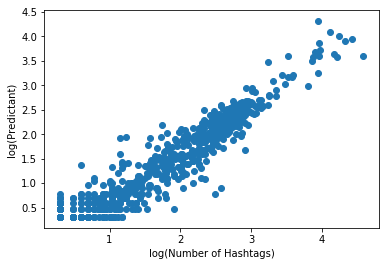

In [14]:
plt.clf()
plt.scatter(np.log10(new_features_1[0:,3]+2),np.log10(target+2))
plt.xlabel('log(Number of Hashtags)')
plt.ylabel('log(Predictant)')
plt.show()

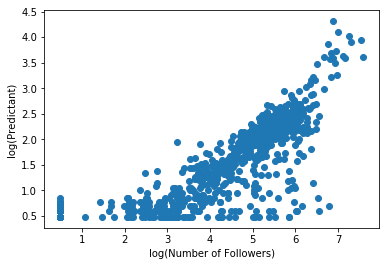

In [15]:
plt.clf()
plt.scatter(np.log10(new_features_1[0:,2]+3),np.log10(target+3))
plt.xlabel('log(Number of Followers)')
plt.ylabel('log(Predictant)')
plt.show()

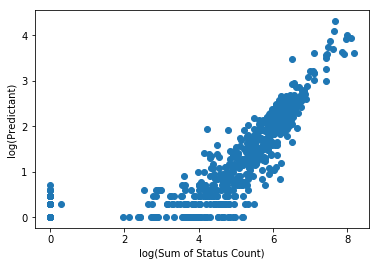

In [16]:
plt.clf()
plt.scatter(np.log10(new_features_1[0:,9]+1),np.log10(target+1))
plt.xlabel('log(Sum of Status Count)')
plt.ylabel('log(Predictant)')
plt.show()

# Question-4

In [17]:
#1422806400 - Feb. 1, 8:00 a.m.
#1422849600 - Feb. 1, 8:00 p.m.
#Periods = [1422806400, 1422849600]
Periods = [[2, 1, 8], [2, 1, 20]]

index_period1 = (Periods[0][0]-1)*31*24 + (Periods[0][1]-9)*24 + (Periods[0][2]-12)
index_period2 = (Periods[1][0]-1)*31*24 + (Periods[1][1]-9)*24 + (Periods[1][2]-12)

print(Periods[0])
print(index_period1)
print(index_period2)

[2, 1, 8]
548
560


In [18]:
features_period1 = new_features_1[:index_period1]
features_period2 = new_features_1[index_period1:index_period2]
features_period3 = new_features_1[index_period2:]
target_period1 = target[:index_period1]
target_period2 = target[index_period1:index_period2]
target_period3 = target[index_period2:]

In [29]:
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score
import math
regr = linear_model.LinearRegression()
period1_cv = cross_val_score(regr, features_period1, target_period1, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
print period1_cv
period1_cv = np.mean(period1_cv)
print 'Average %0.2f' % abs(period1_cv)

[  -9.11785492   -9.89090131  -17.01095825  -35.76851827 -273.99321591
  -83.0296043  -502.19776694 -845.06645245 -152.74838641 -145.65575066]
Average 207.45


In [30]:
regr = linear_model.LinearRegression()
period2_cv = cross_val_score(regr, features_period2, target_period2, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
print period2_cv
period2_cv = np.mean(period2_cv)
print 'Average %0.2f' % abs(period2_cv)

[ -185.291597    -642.19597072  -106.13774124  -191.11216762  -114.20723003
  -349.93680608  -233.94153466  -154.12059558  -294.46458705 -2058.81888367]
Average 433.02


In [31]:
regr = linear_model.LinearRegression()
period3_cv = cross_val_score(regr, features_period3, target_period3, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
print period3_cv
period3_cv = np.mean(period3_cv)
print 'Average %0.2f' % abs(period3_cv)

[ -187.20952882  -202.36747625  -210.28151945  -132.51497039  -115.99542318
  -602.01361791 -1188.53878513  -111.29545122  -111.08473145  -115.19927535]
Average 297.65


# Question-5

In [10]:

tests_data_path = 'sample1_period1.txt'

tests_firstpost_date = []
tests_title = []
tests_tweet = []
tests_metrics = []
tests_file = open(tests_data_path, "rt" )
for line in tests_file:
    try:
        test = json.loads(line)
        tests_firstpost_date.append(test['firstpost_date'])
        tests_tweet.append(test['tweet'])
        tests_title.append(test['title'])
        tests_metrics .append(test['metrics'])
    except:
        continue
tests_firstpost_date

[1422554405,
 1422554420,
 1422554426,
 1422554446,
 1422554451,
 1422554498,
 1422554523,
 1422554563,
 1422554565,
 1422554582,
 1422554592,
 1422554597,
 1422554714,
 1422554733,
 1422554739,
 1422554794,
 1422554820,
 1422554853,
 1422554873,
 1422554959,
 1422554975,
 1422555011,
 1422555030,
 1422555050,
 1422555065,
 1422555080,
 1422555090,
 1422555123,
 1422555138,
 1422555157,
 1422555159,
 1422555162,
 1422555179,
 1422555209,
 1422555218,
 1422555235,
 1422555259,
 1422555312,
 1422555346,
 1422555375,
 1422555383,
 1422555387,
 1422555396,
 1422555430,
 1422555447,
 1422555487,
 1422555501,
 1422555514,
 1422555521,
 1422555542,
 1422555545,
 1422555574,
 1422555582,
 1422555612,
 1422555615,
 1422555659,
 1422555660,
 1422555683,
 1422555686,
 1422555710,
 1422555727,
 1422555739,
 1422555743,
 1422555743,
 1422555794,
 1422555812,
 1422555836,
 1422555837,
 1422555882,
 1422555936,
 1422555967,
 1422555967,
 1422555983,
 1422555998,
 1422556051,
 1422556066,
 1422556092,

In [11]:
tests = pd.DataFrame()
tests['firstpost_date'] = tests_firstpost_date
tests['tweet'] = tests_tweet
tests['title'] = tests_title
tests['metrics'] = tests_metrics
Test_details = pd.DataFrame.from_records(tests['tweet'])
Metrics = pd.DataFrame.from_records(tests['metrics'])
#tests

In [12]:
test_user = []
for elements in Test_details['user']:
    test_user.append(elements)
test_user = pd.DataFrame(test_user)
#tweet_user

In [13]:
test_initial = [datetime.fromtimestamp(tests.firstpost_date[0]).month,
                     datetime.fromtimestamp(tests.firstpost_date[0]).day,
                     datetime.fromtimestamp(tests.firstpost_date[0]).hour]
test_initial

[1, 29, 10]

In [14]:
Test_Time_stamps = []
for x in tests['firstpost_date']:
   Test_Time_stamps.append([datetime.fromtimestamp(x).month,  datetime.fromtimestamp(x).day,  datetime.fromtimestamp(x).hour])
Test_Time_stamps
print(len(Test_Time_stamps))

730


In [15]:
n_test_tweets = np.zeros((7,1))
n_test_retweets = np.zeros((7,1))
n_test_followers = np.zeros((7,1))
max_test_followers = np.zeros((7,1))
n_test_hours = np.zeros((7,1))
test_day_of_week = np.zeros((7,1))
index = 0
for Time in Test_Time_stamps:
    index_2 = (Time[0]-test_initial[0])*31*24 + (Time[1]-test_initial[1])*24 + (Time[2]-test_initial[2])
    n_test_tweets[index_2] += 1
    n_test_retweets[index_2] += Test_details.retweet_count[index]
    n_test_followers[index_2] += test_user.followers_count[index]
    max_test_followers[index_2] = max(test_user.followers_count[index], max_test_followers[index_2])
    index +=1
for i in range (0,6):
    n_test_hours[i] = (i+test_initial[2]) % 24 
    test_day_of_week[i] = (np.ceil((i+12) / 24)+4) % 7
test_features_1 = np.concatenate((n_test_hours[0:-1], n_test_tweets[0:-1], n_test_retweets[0:-1], n_test_followers[0:-1],
                                  max_test_followers[0:-1] ), axis=1)
test_features = [n_test_hours[0:-1], n_test_tweets[0:-1], n_test_retweets[0:-1], n_test_followers[0:-1], max_test_followers[0:-1]]
#test_features_1 = pd.DataFrame(test_features_1)
test_features_1

array([[  1.00000000e+01,   1.37000000e+02,   3.90000000e+01,
          1.87706600e+06,   3.80073000e+05],
       [  1.10000000e+01,   8.20000000e+01,   1.40000000e+01,
          9.41824000e+05,   5.95896000e+05],
       [  1.20000000e+01,   6.80000000e+01,   8.00000000e+00,
          1.71570670e+07,   5.62009300e+06],
       [  1.30000000e+01,   9.40000000e+01,   5.00000000e+00,
          2.73361000e+05,   3.84740000e+04],
       [  1.40000000e+01,   1.71000000e+02,   1.60000000e+01,
          2.98529000e+05,   6.42060000e+04],
       [  1.50000000e+01,   1.78000000e+02,   2.60000000e+01,
          3.95140000e+05,   6.25950000e+04]])

In [16]:
x_p = test_features_1[5]
x_p = np.append(0,x_p)
print(x_p)
pr = model.predict(x_p)
print(abs(pr))

[  0.00000000e+00   1.50000000e+01   1.78000000e+02   2.60000000e+01
   3.95140000e+05   6.25950000e+04]
[ 136.6862607]
